Name: Allen Jerome B. Gonzales | Rose Ann A. Taller<br>
Course and Section: CPE019 - CPE32S5<br>
Date of Submission: March 10, 2024<br>
Instructor: Engr. Roman Richard<br>

# **Prelim Examination**

#Linear Regression  - Singular LR#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('diabetes.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


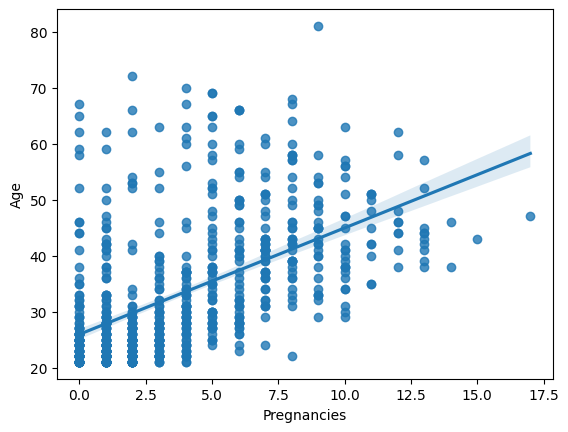

In [ ]:
sns.regplot(y="Age", x="Pregnancies", data=data);

- According to the plot, there is a positive correlation between Age and Pregnancies, The regression line also shows that as the number of pregnancies increases, the age also increases.

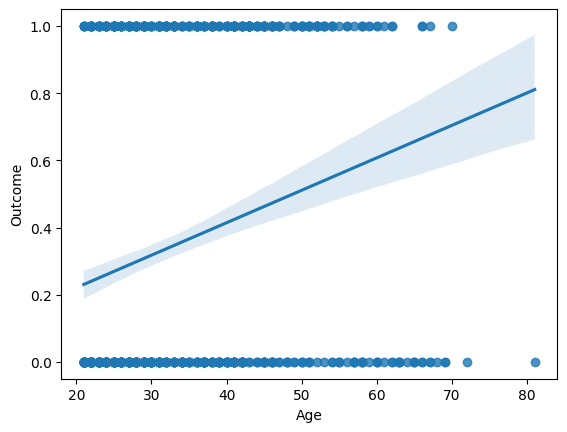

In [ ]:
sns.regplot(y="Outcome", x="Age", data=data);

- From the plotted data, we can observe a positive relationship between Age and Outcome for diabetes, As the age increases, the probability of diabetes also increases. The regression line shows that as the people get older, the higher change they can get diabetes.

#Linear Regression  - Multiple LR#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

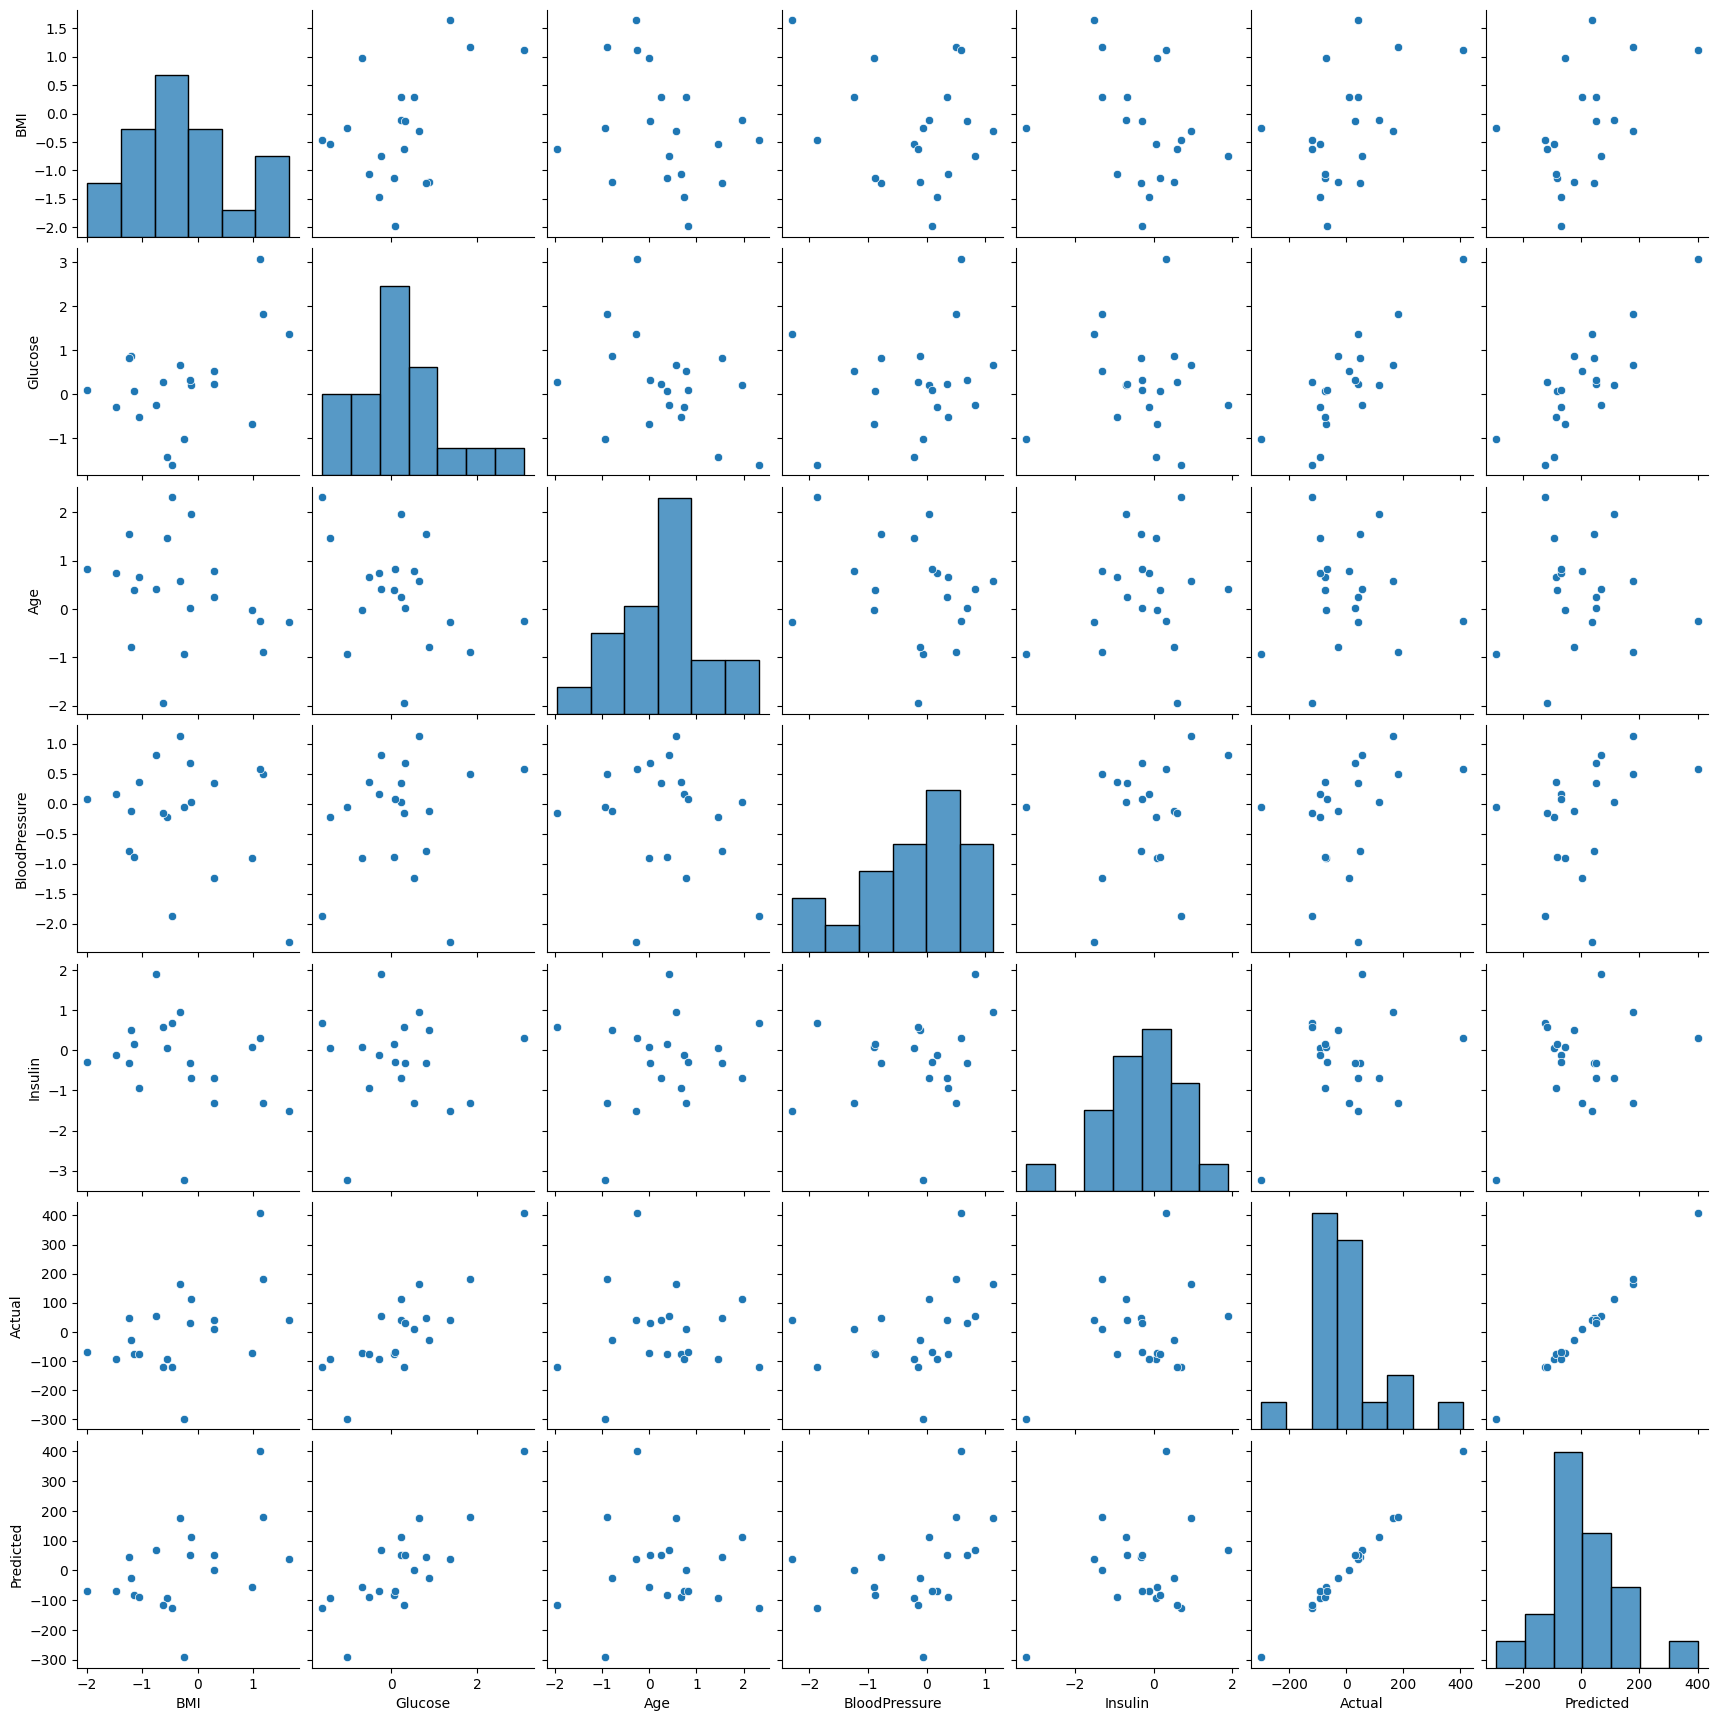

In [ ]:
# Generate synthetic data for illustration
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
columns = ["BMI", "Glucose", "Age", "BloodPressure", "Insulin"]
mlr = pd.DataFrame(X, columns=columns)
mlr['Outcome'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mlr[columns], mlr['Outcome'], test_size=0.2, random_state=42)

# Initialize a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Create a pair plot for the actual vs. predicted values
mlr_test = X_test.copy()
mlr_test['Actual'] = y_test
mlr_test['Predicted'] = y_pred

sns.pairplot(mlr_test, vars=['BMI', 'Glucose', 'Age', 'BloodPressure', 'Insulin', 'Actual', 'Predicted'])
plt.show()

Evaluation

*   In this model, we used a pair plot to visualize the multiple linear regression. This visualization tool allows us to quickly examine each feature and the alignment between the actual and predicted values.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 8.437614476433852
Mean Squared Error: 113.448003180608
R-squared: 0.9944099738323338


Evaluation

*   We also print out the three regression evaluation metrics. In this part, mae is the average absolute difference between the predicted values (y_pred) and the actual values (y_test). It measures the average magnitude of errors without considering their direction. In this case, the MAE is approximately 8.44. While, mse is the average of the squared differences between the predicted and actual values. It gives higher weight to larger errors. The mse in this case is approximately 113.45. Lastly, R-squared is a measure of how well the predicted values explain the variance in the actual values. It ranges from 0 to 1, with 1 indicating a perfect fit. The R² value of approximately 0.99 suggests that the model explains about 99.44% of the variance in the target variable.

#Linear Regression  - Polynomial LR#

Train MSE: 0.44307406211313616
Test MSE: 0.4681069250161883
Train R2: 0.13350627908427293
Test R2: 0.0455928382971148


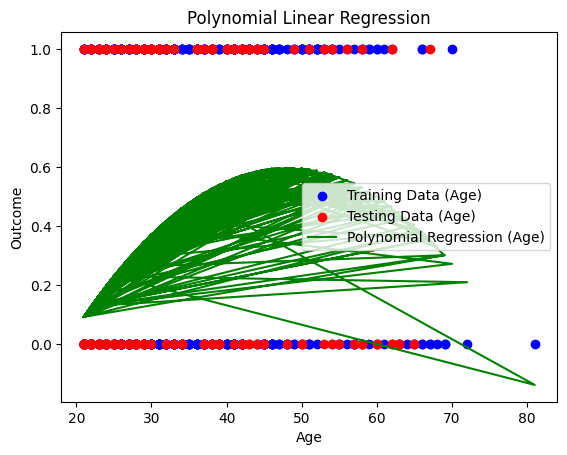

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("diabetes.csv")

X = data['Age'].values.reshape(-1, 1)
y = data['Outcome'].values.reshape(-1, 1)

# Preprocess the data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a polynomial regression model
# Transform input features into polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model
# Predict on the training set
y_train_predicted = model.predict(X_train_poly)

# Predict on the test set
y_test_predicted = model.predict(X_test_poly)

# Calculate performance metrics
train_mse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
test_mse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predicted)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R2:", r2_train)
print("Test R2:", r2_test)

# Visualize the results (plotting only one feature against outcome)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training Data (Age)')
plt.scatter(X_test[:, 0], y_test, color='red', label='Testing Data (Age)')
plt.plot(X_train[:, 0], y_train_predicted, color='green', label='Polynomial Regression (Age)')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Polynomial Linear Regression')
plt.legend()
plt.show()

Evaluation:
- The MSE for the training data is 0.44307, and for the testing data, it is 0.468106, indicating that the model's predictions are very close to the actual data however the R2 for the training data  is only 0.1135 which means only that percentage is explained by this particular model when applied to the training data, The R2 for the test data is 0.0456 which means only 4.56% is explain in the test data. This indicates that the given model does not fit the data very well

- Also because of the outcome being binary (0 or 1), the regression line can't provide a very clear distinction between the variables.

- In summary, Polynomial linear regression is not the best model to use for this specific data because of the outcomes being binary and R2 results being low.

#Logistic Regression#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Evaluation

*   As we can see in the displayed output, this model gives an approximately 75% accuracy score which means that it is performing well. We can also see that the false positives is 21 while the false negatives is 18.
* For class 0, the model has relatively high precision (0.81) and recall (0.79), resulting in a balanced F1-score (0.80).
* For class 1, the precision is slightly lower (0.64), and the recall is also lower (0.67), leading to a lower F1-score (0.65).


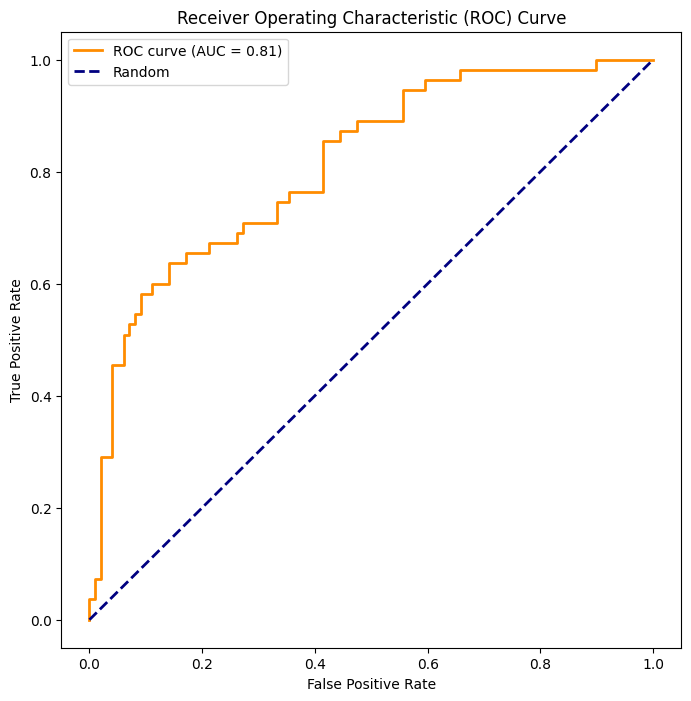

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = logreg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Evaluation

* The ROC curve visually represents the trade-off between true positive rate (sensitivity) and false positive rate, and the AUC quantifies the overall performance of the model across different classification thresholds. As shown in the ROC Curve, it results to 0.81 AUC that indicates to a strong discriminatory power of the model itself.

#Decision Tree#

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree

data = pd.read_csv("diabetes.csv")

y_target = data["Outcome"].values
columns = ["Age", "BloodPressure", "Insulin", "BMI", "Glucose", "Pregnancies"]
#create the variable to hold the features that the classifier will use
X_input = data[list(columns)].values

#create clf_train as a decision tree classifier object
clf_data = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_data = clf_data.fit(X_input, y_target)

clf_data.score(X_input,y_target)

0.7734375

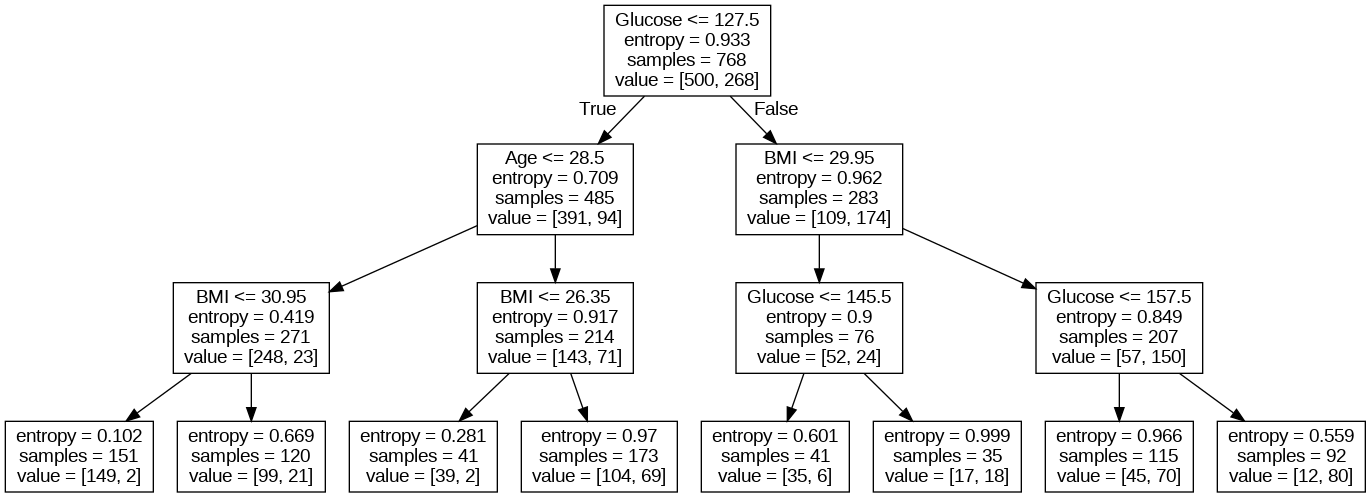

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_file_path = "diabetes.dot"
with open(dot_file_path, 'w') as f:
 f = export_graphviz(clf_data, out_file=f, feature_names=columns)

!dot -Tpng ./diabetes.dot -o ./diabetes.png
Image("./diabetes.png")


In [ ]:
#import the file into the 'testing' dataframe.
testing = pd.read_csv("diabetes.csv")

In [ ]:
columns = ["Age", "BloodPressure", "Insulin", "BMI", "Glucose", "Pregnancies"]
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_data.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Outcome':target_labels, 'Pregnancies':testing['Pregnancies']})

#display the first few rows of the data set
testing.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns
X = data[list(["Age", "BloodPressure", "Insulin", "BMI", "Glucose", "Pregnancies"])].values
y = data["Outcome"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [ ]:
#create the training decision tree object
clf_data = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_data = clf_data.fit(X_train, y_train)

In [ ]:
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_data.score(X_train,y_train))
test_score = str(clf_data.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.7652173913043478 Testing score = 0.724025974025974


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing set
y_pred_test = clf_data.predict(X_test)

# Compute precision, recall, F1-score, and ROC-AUC score
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Precision: 0.78125
Recall: 0.24271844660194175
F1-score: 0.37037037037037046
ROC-AUC score: 0.6042860525692635


Evaluation:
- Based on the decision tree model, the training score is 0.76521 which indicates the model fits the training data very well. The testing data score is 0.724025 which means the model generalize to unseen data well.



#Random Forest#

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd

In [ ]:
columns=data.columns[:8]
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=data[data.columns[:8]]
Y=data['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.242098
BMI                         0.172574
Age                         0.135220
DiabetesPedigreeFunction    0.128324
BloodPressure               0.092903
Pregnancies                 0.086774
SkinThickness               0.073109
Insulin                     0.068999
dtype: float64

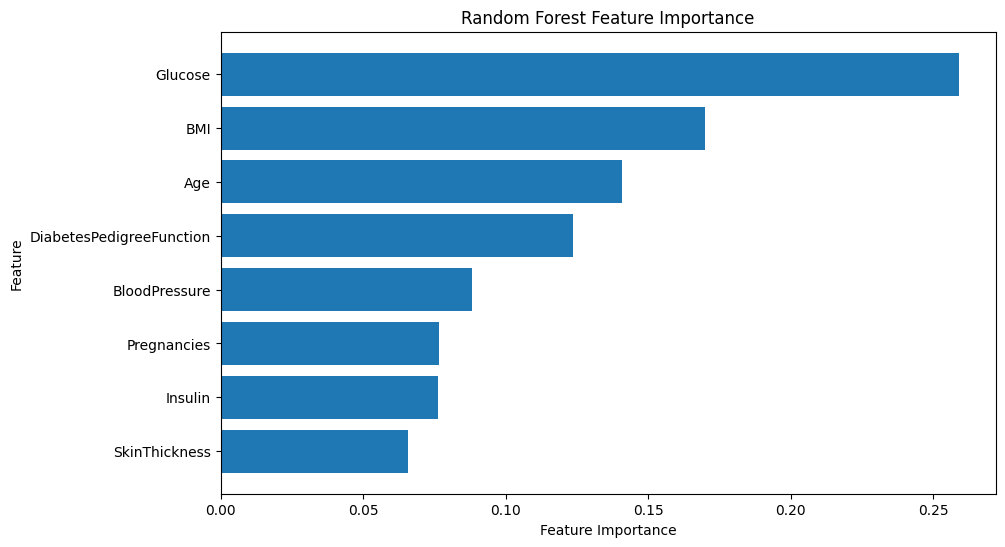

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plot feature importances
feature_importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


Evaluation

* The features are ranked based on their importance. The higher the value, the more influential the feature is in making predictions.
*Glucose is identified as the most important feature, followed by BMI and Age.
*Features with lower importances, such as Skin Thickness and Insulin, are still considered in the model but have less impact on predictions.

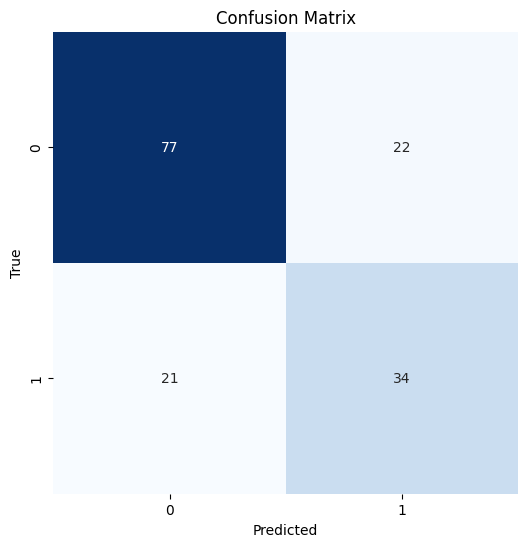

In [ ]:
y_pred = rf_model.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluation

* True Positive: 34 cases were correctly predicted as positive.
* True Negative: 77 cases were correctly predicted as negative.
* False Positive: 22 cases were incorrectly predicted as positive.
* False Negative: 21 cases were incorrectly predicted as negative.

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("Specificity:", specificity)


Accuracy: 0.7207792207792207
Precision: 0.6071428571428571
Recall (Sensitivity): 0.6181818181818182
Specificity: 0.7777777777777778


Evaluation
* Accuracy: The model correctly predicted the class of around 72.08% of instances in the test set.
* Precision: About 60.71% of the instances predicted as positive by the model were true positives.
* Recall (Sensitivity): The model captured approximately 61.82% of the actual positive instances.
* Specificity: The model correctly identified around 77.78% of the actual negative instances.

# **Summary**

- In summary, This activity tackled about different models that can be used for analysis, classification or prediction of data. Three types of linear regression is used, Simple, Multiple, and Polynomial linear regression are used. Logistic Regression, Decision tree, and Random forest models are also used. These models are helpful in finding different results from a given data.

# **Lesson Learned**

- We learned that the performance of various machine learning algorithms varies according on the type of problem being addressed. Before choosing the algorithm that best fits the task, it is important to understand the advantages and disadvantages of each.

# **Conclusion**

- With this laboratory activity, we explored various machine learning models for classifying and predicting analysis problems. This exploration provides a comprehensive understanding of how crucial it is to choose the right machine learning model for a specific problem.